In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
pre_pri = pd.read_excel("data/pre_pri.xlsx", index_col = 0)
pre_sec = pd.read_excel("data/pre_sec.xlsx", index_col = 0)
pre_total = pd.read_excel("data/pre_total.xlsx", index_col = 0)
pre_home_alone = pd.read_excel("data/pre_home_alone.xlsx", index_col = 0)

dur_pri = pd.read_excel("data/dur_pri.xlsx", index_col = 0)
dur_sec = pd.read_excel("data/dur_sec.xlsx", index_col = 0)
dur_total = pd.read_excel("data/dur_total.xlsx", index_col = 0)
dur_home_alone = pd.read_excel("data/dur_home_alone.xlsx", index_col = 0)

In [124]:
pre_pri=pre_pri.drop(['Missing'], axis=1)
pre_sec=pre_sec.drop(['Missing'], axis=1)
pre_total=pre_total.drop(['Missing'], axis=1)

dur_pri=dur_pri.drop(['Missing'], axis=1)
dur_sec=dur_sec.drop(['Missing'], axis=1)
dur_total=dur_total.drop(['Missing'], axis=1)

In [125]:
pre_pri.describe()

,Managing/taking medication,Monitoring health,Deliberate exercise,Preparing food/cleaning after food,Consuming food/drink,Sleep,Personal hygiene,Non-deliberate exercise,Shopping,Working,...,Arts and hobbies,Resting,Driving,Planning/organising,Spending time with family members,Spending time with spouse,Spending time with friends,Tending domestic animals,Taking care of children/grandchildren,Participating in study
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.365385,0.211538,0.358974,0.596154,1.634615,8.192308,0.897436,1.102564,0.403846,1.660256,...,0.262821,0.807692,0.698718,0.121795,0.192308,0.051282,0.358974,0.198718,0.211538,1.448718
std,0.405570,0.348194,0.555162,0.600320,0.692851,1.480760,0.571697,0.987789,0.476499,2.745696,...,0.648371,0.920981,0.781763,0.372850,0.482338,0.261488,1.021646,0.642943,0.619243,0.498373
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.166667,1.208333,7.666667,0.500000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.166667
50%,0.333333,0.000000,0.000000,0.333333,1.666667,8.083333,0.833333,0.833333,0.250000,0.000000,...,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333
75%,0.500000,0.333333,0.625000,1.166667,2.000000,8.625000,1.333333,1.958333,0.791667,2.333333,...,0.000000,1.291667,1.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,1.833333
max,1.500000,1.166667,1.833333,2.000000,3.333333,11.833333,2.000000,3.166667,1.500000,8.166667,...,2.666667,3.166667,3.166667,1.666667,2.166667,1.333333,5.000000,3.166667,2.500000,2.500000


In [126]:
dur_pri.describe()

,Managing/taking medication,Monitoring health,Deliberate exercise,Preparing food/cleaning after food,Consuming food/drink,Sleep,Personal hygiene,Non-deliberate exercise,Shopping,Working,...,Arts and hobbies,Resting,Driving,Planning/organising,Spending time with family members,Spending time with spouse,Spending time with friends,Tending domestic animals,Taking care of children/grandchildren,Participating in study
count,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.0,15.0,15.000000
mean,0.266667,0.0,0.333333,0.655556,2.000000,8.511111,0.411111,2.255556,0.633333,0.633333,...,1.077778,2.733333,0.811111,0.011111,0.322222,0.0,0.066667,0.0,0.0,0.011111
std,0.518698,0.0,0.766356,0.984940,0.729209,2.408209,0.371967,3.502758,1.252299,2.452889,...,3.541627,5.029989,1.996889,0.043033,0.640767,0.0,0.258199,0.0,0.0,0.043033
min,0.000000,0.0,0.000000,0.000000,1.000000,3.666667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,1.500000,7.250000,0.083333,0.166667,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.333333,1.833333,8.500000,0.333333,0.500000,0.000000,0.000000,...,0.000000,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
75%,0.333333,0.0,0.000000,0.666667,2.583333,10.416667,0.583333,3.250000,0.500000,0.000000,...,0.000000,2.750000,0.833333,0.000000,0.166667,0.0,0.000000,0.0,0.0,0.000000
max,1.833333,0.0,2.666667,3.500000,3.500000,11.666667,1.166667,13.166667,4.166667,9.500000,...,13.666667,20.000000,7.833333,0.166667,2.000000,0.0,1.000000,0.0,0.0,0.166667


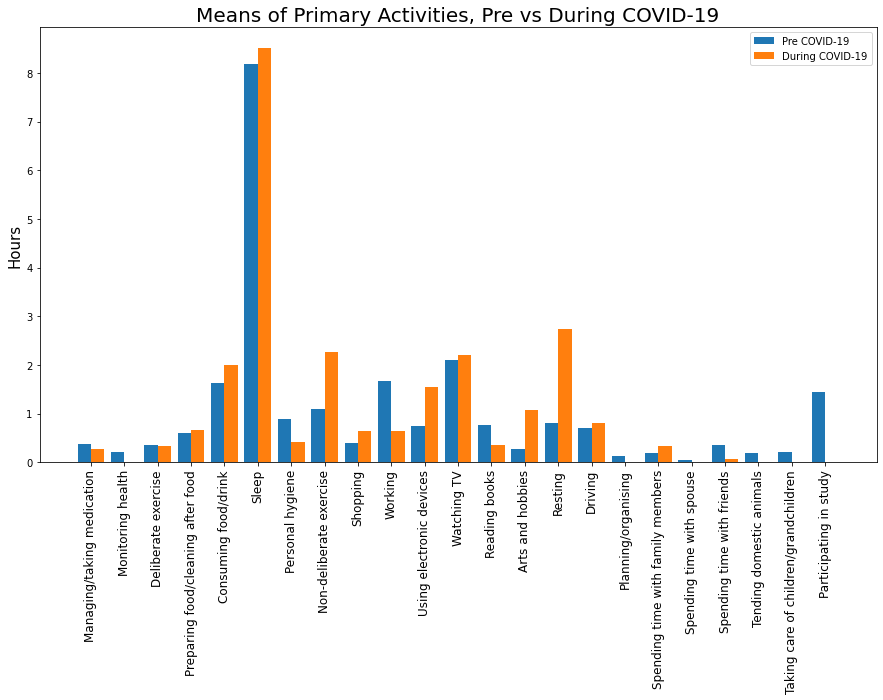

In [133]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

ax.bar(x, pre_pri.mean(), width=barWidth, label='Pre COVID-19')
ax.bar(x+barWidth, dur_pri.mean(), width=barWidth, label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:], rotation=90, size=12)
ax.set_title('Means of Primary Activities, Pre vs During COVID-19', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

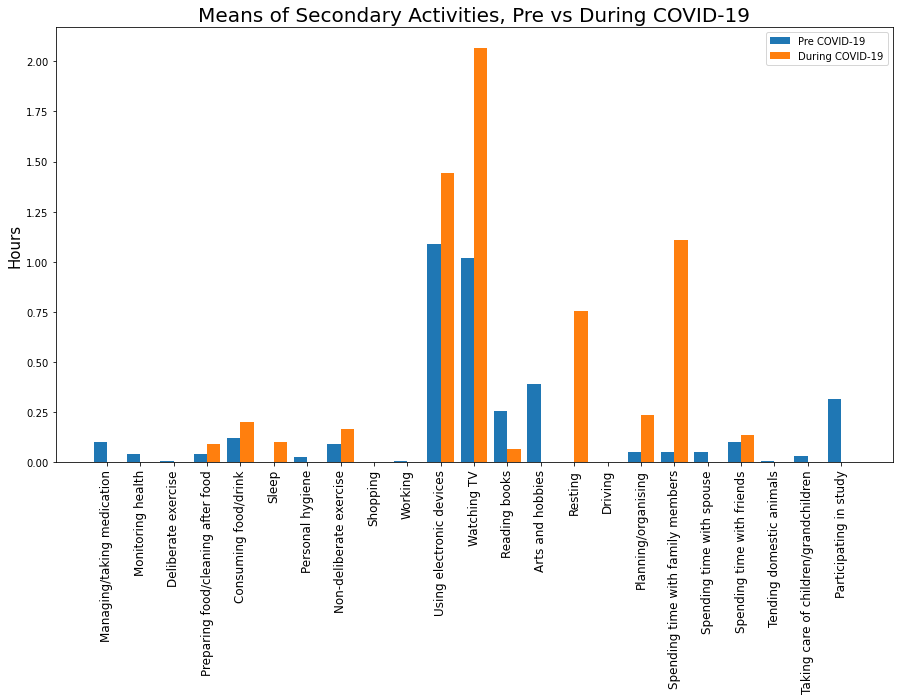

In [134]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

ax.bar(x, pre_sec.mean(), width=barWidth, label='Pre COVID-19')
ax.bar(x+barWidth, dur_sec.mean(), width=barWidth, label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:], rotation=90, size=12)
ax.set_title('Means of Secondary Activities, Pre vs During COVID-19', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

**Note:** y-axis scaled to two hours instead of eight

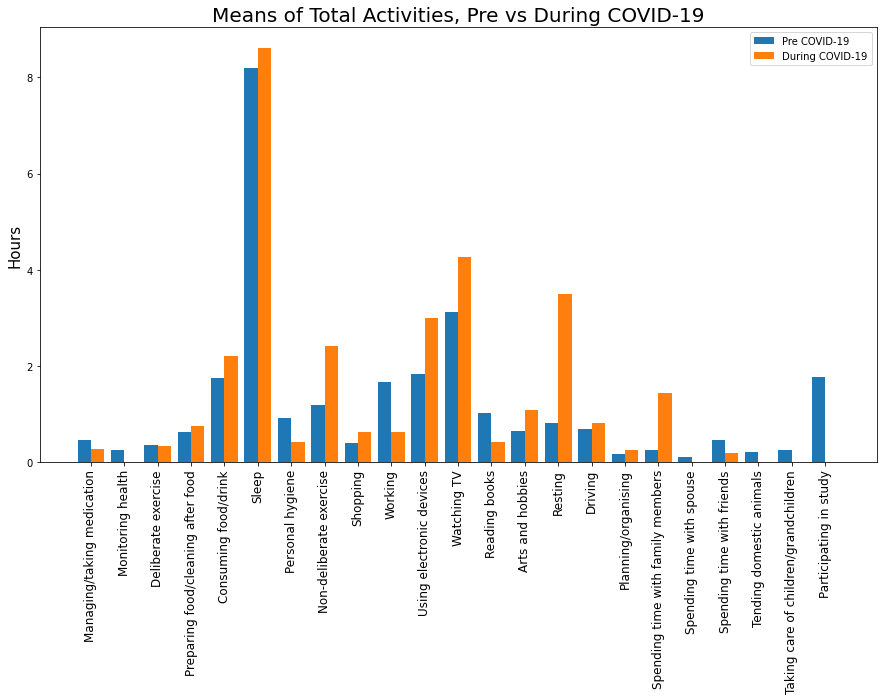

In [135]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

ax.bar(x, pre_total.mean(), width=barWidth, label='Pre COVID-19')
ax.bar(x+barWidth, dur_total.mean(), width=barWidth, label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:], rotation=90, size=12)
ax.set_title('Means of Total Activities, Pre vs During COVID-19', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()